# **Feature Extraction and Fine-Tuning with MobileNetV2 and Hyperparameter Optimization**

This notebook illustrates the process of leveraging MobileNetV2 for feature extraction and fine-tuning on a custom dataset. The primary focus is on optimizing hyperparameters to enhance model performance.

Found 207 files belonging to 9 classes.
Found 229 files belonging to 9 classes.
Found 6840 files belonging to 9 classes.
0   Abulkasim
1   Baroqxon
2   Kokaldosh
3   Qaffol
4   Qaldrgoch
5   SHayhontohur
6   Shayhontohur_darvozasi
7   Suzuk ota
8   Yunusxon


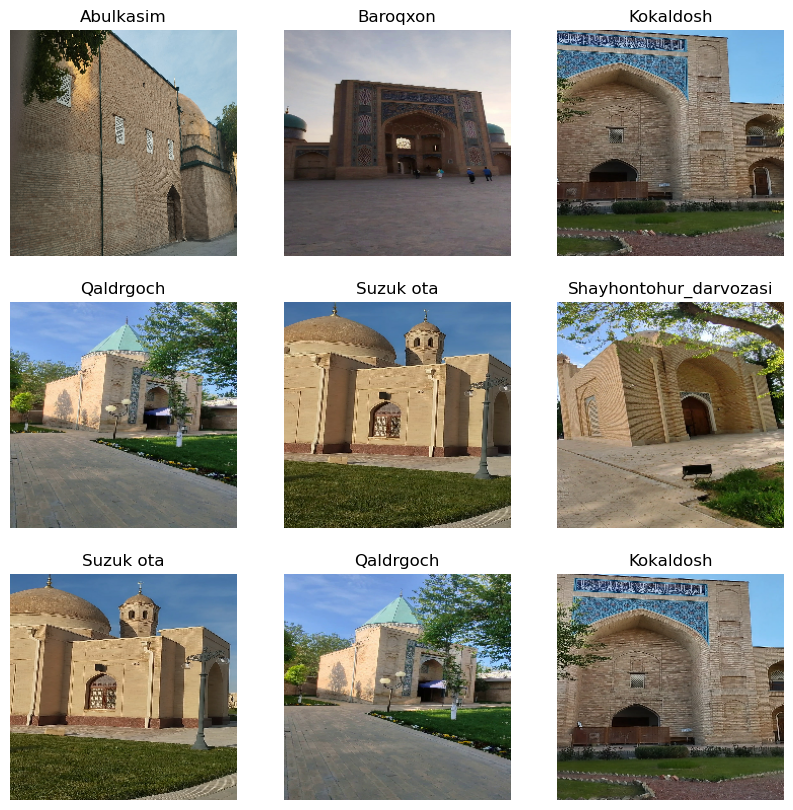

0 [[[-2.4239719e-02  2.2674072e-01  5.3094244e-01]
  [-2.5320113e-02  2.2566020e-01  5.3154266e-01]
  [-1.0644317e-02  2.2526002e-01  5.3048217e-01]
  ...
  [-3.1596637e-01  1.0084033e-02  4.6666670e-01]
  [-3.1596637e-01 -2.2408962e-03  4.6050417e-01]
  [-3.1596637e-01 -2.2408962e-03  4.6050417e-01]]

 [[-2.7450979e-02  2.2352946e-01  5.4509807e-01]
  [ 3.1712055e-03  2.5415170e-01  5.7572031e-01]
  [ 4.5938373e-02  2.6904762e-01  5.7843137e-01]
  ...
  [-3.4117645e-01  1.9607902e-02  4.1176474e-01]
  [-3.0980390e-01  1.1764765e-02  4.1960788e-01]
  [-3.0451161e-01  1.7057061e-02  4.2490017e-01]]

 [[ 5.2000880e-02  2.3249292e-01  5.6185484e-01]
  [ 5.8973551e-02  2.4018610e-01  5.6134450e-01]
  [ 1.0532212e-01  3.0140054e-01  6.1512601e-01]
  ...
  [-3.1361622e-01  1.0931492e-04  4.6285439e-01]
  [-3.3333331e-01  3.9216280e-03  4.3109107e-01]
  [-3.2493001e-01  1.2324929e-02  4.2801118e-01]]

 ...

 [[-5.1928806e-01 -5.0360179e-01 -5.8987629e-01]
  [-5.7412010e-01 -5.5843383e-01 -6.4

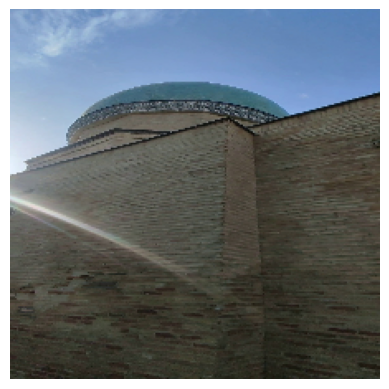

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_2[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[

In [30]:
%run -i Model.ipynb

### **Importing necessary libraries**

In [31]:
from keras.callbacks import EarlyStopping
from keras_tuner import RandomSearch
import matplotlib.pyplot as plt

### **Hyperparameter Tuning with Random Search**

In [32]:
tuner = RandomSearch(
    build_model_feature_extraction,
    objective='val_accuracy',
    max_trials=3,
    executions_per_trial=1,
    directory='./',
    project_name='Image_classification_food_ingredients_v1'
)

tuner.search(train_ds, epochs=3, validation_data=val_ds)

Reloading Tuner from ./Image_classification_food_ingredients_v1\tuner0.json


### **Get the best hyperparameters**

In [33]:
# Get the best hyperparameters from the tuner
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Retrieve the best learning rate from the best hyperparameters
base_learning_rate = best_hps.get('learning_rate')


### **Build feature extraction model and show summary**

In [34]:
# Build the model using the best hyperparameters for feature extraction
model = build_model_feature_extraction(best_hps)

# Print a summary of the model architecture
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d_1  (None, 1280)              0         
  (GlobalAveragePooling2D)                                       
                                                                 
 flatten_1 (Flatten)         (None, 1280)              0         
                                                                 
 dense_4 (Dense)             (None, 512)               655872    
                                                                 
 activation_4 (Activation)   (None, 512)               0         
                                                                 
 dropout_2 (Dropout)         (None, 512)              

### **Visualize the model architecture with shape information**

In [7]:
tf.keras.utils.plot_model(model, show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

### **Early Stopping Configuration for Model Training**

In [35]:
early_stopping = EarlyStopping(
    monitor="val_loss",      # Monitor validation loss
    min_delta=0.001,         # Minimum change in the monitored quantity to qualify as an improvement
    patience=3,             # Number of epochs with no improvement after which training will be stopped
    verbose=1,               # Verbosity mode. 0: silent, 1: progress bar, 2: one line per epoch
    mode="auto",             # Direction of improvement to detect, automatically inferred from the monitored quantity
    baseline=None,           # Baseline value for the monitored quantity, used for early stopping
    restore_best_weights=False  # Whether to restore model weights from the epoch with the best value of the monitored quantity
)

### **Number of epochs for training**

In [36]:
epochs_size = 10

### **Model Training with Feature Extraction and Early Stopping**

In [37]:
print("Feature extraction\n")

# Train the model with feature extraction and early stopping
history_feature_extraction = model.fit(train_ds, epochs=epochs_size, validation_data=val_ds, callbacks=early_stopping)

Feature extraction

Epoch 1/10
214/214 [==============================] - 34s 152ms/step - loss: 0.1882 - accuracy: 0.9439 - val_loss: 0.0289 - val_accuracy: 0.9903
Epoch 2/10
214/214 [==============================] - 32s 149ms/step - loss: 0.0057 - accuracy: 0.9988 - val_loss: 0.0411 - val_accuracy: 0.9855
Epoch 3/10
214/214 [==============================] - 33s 152ms/step - loss: 0.0316 - accuracy: 0.9908 - val_loss: 0.2764 - val_accuracy: 0.9130
Epoch 4/10
214/214 [==============================] - 33s 154ms/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.0478 - val_accuracy: 0.9855
Epoch 4: early stopping


### **Accuracy and Loss Comparison Across Epochs- Feature Extraction**

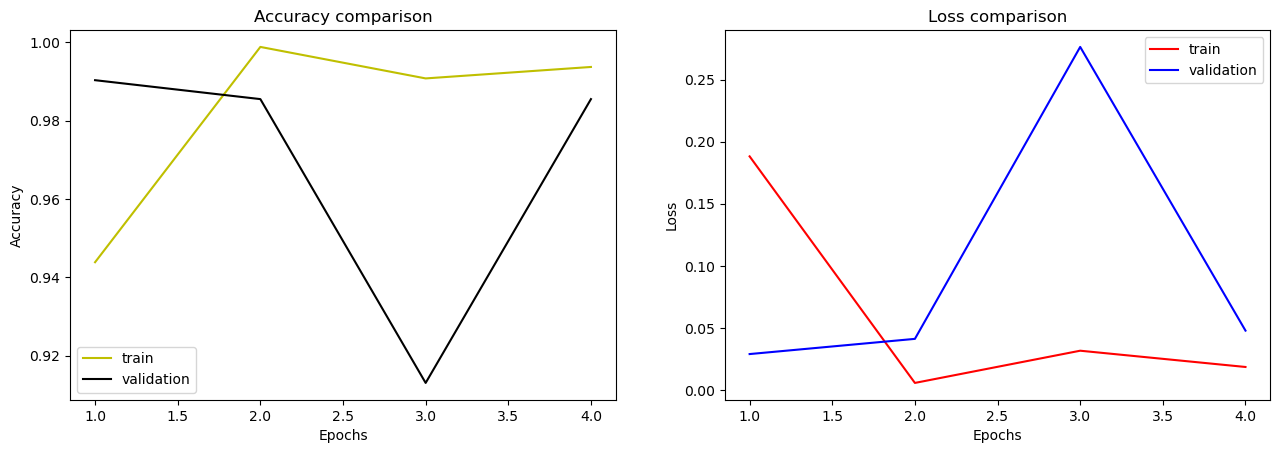

In [38]:
epochs = range(1, len(history_feature_extraction.history['accuracy']) + 1)

# Plot accuracy and loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history_feature_extraction.history['accuracy'], color='y', label='train')
plt.plot(epochs, history_feature_extraction.history['val_accuracy'], color='k', label='validation')
plt.legend()
plt.title('Accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, history_feature_extraction.history['loss'], color='r', label='train')
plt.plot(epochs, history_feature_extraction.history['val_loss'], color='b', label='validation')
plt.legend()
plt.title('Loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplots_adjust(right=2)
plt.show()

### **Build the fine tuning model**

In [12]:
build_model_fine_tuning()

### **Compile the fine tuning model**

In [13]:
model.compile(optimizer=Adam(learning_rate=base_learning_rate/10), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **Summary of fine tuning model**

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0

### **Visulaize the fine tuning model**

In [17]:
tf.keras.utils.plot_model(model, show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [16]:
!pip install plot_model

### **Continue training the model**

In [18]:
# Calculate the initial number of epochs based on the length of the accuracy history
initial_epochs = len(history_feature_extraction.history['accuracy'])

# Define the number of epochs for fine-tuning
fine_tune_epochs = 10

# Calculate the total number of epochs for fine-tuning
total_epochs = initial_epochs + fine_tune_epochs


### **Model Training with Fine tuning and Early Stopping**

In [19]:
print("Fine tuning\n")
history_fine_tuning = model.fit(train_ds, epochs=total_epochs, initial_epoch=initial_epochs, validation_data=val_ds, callbacks=early_stopping)

Fine tuning

Epoch 5/14
214/214 [==============================] - 64s 275ms/step - loss: 0.0315 - accuracy: 0.9917 - val_loss: 0.4051 - val_accuracy: 0.9324
Epoch 6/14
214/214 [==============================] - 59s 274ms/step - loss: 0.0011 - accuracy: 0.9999 - val_loss: 0.4202 - val_accuracy: 0.9420
Epoch 7/14
214/214 [==============================] - 59s 276ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.2384 - val_accuracy: 0.9614
Epoch 8/14
214/214 [==============================] - 58s 268ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 0.2219 - val_accuracy: 0.9807
Epoch 9/14
214/214 [==============================] - 59s 274ms/step - loss: 5.6269e-04 - accuracy: 0.9997 - val_loss: 0.2340 - val_accuracy: 0.9758
Epoch 10/14
214/214 [==============================] - 58s 271ms/step - loss: 0.0161 - accuracy: 0.9961 - val_loss: 0.0697 - val_accuracy: 0.9807
Epoch 11/14
214/214 [==============================] - 58s 269ms/step - loss: 0.0288 - accuracy: 0.9931 - val_lo

### **Accuracy and Loss Comparison Across Epochs- Fine Tuning**

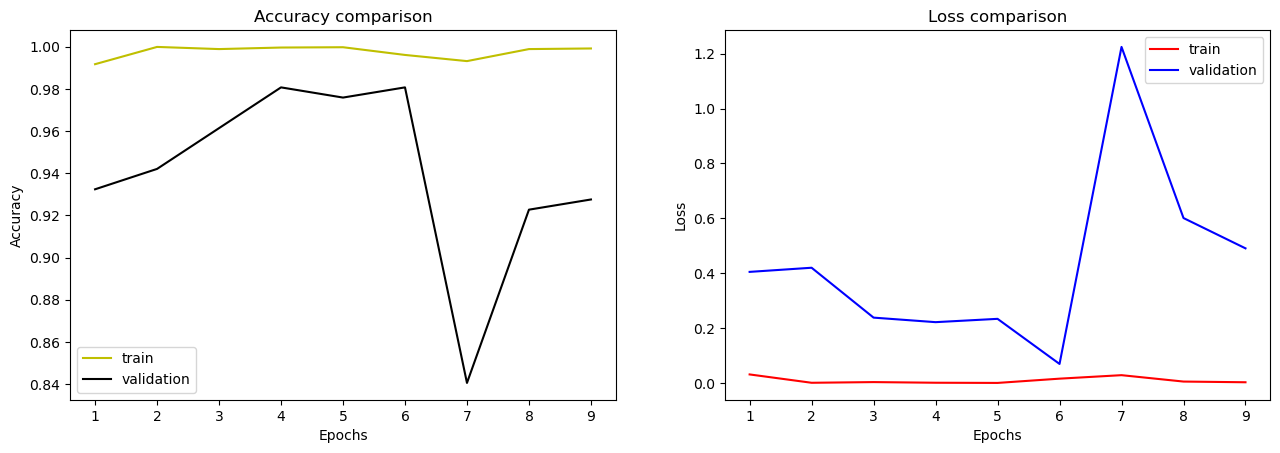

In [20]:
epochs = range(1, len(history_fine_tuning.history['accuracy']) + 1)

# Plot accuracy and loss
plt.subplot(1, 2, 1)
plt.plot(epochs, history_fine_tuning.history['accuracy'], color='y', label='train')
plt.plot(epochs, history_fine_tuning.history['val_accuracy'], color='k', label='validation')
plt.legend()
plt.title('Accuracy comparison')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs, history_fine_tuning.history['loss'], color='r', label='train')
plt.plot(epochs, history_fine_tuning.history['val_loss'], color='b', label='validation')
plt.legend()
plt.title('Loss comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.subplots_adjust(right=2)
plt.show()

In [39]:
import os

In [40]:
model_test=model.evaluate(test_ds)

8/8 [==============================] - 1s 111ms/step - loss: 0.0436 - accuracy: 0.9825


In [23]:
# save model 2.15.0
model.save('D:/minora/bd_minor/model_py/gfgModel.h5')
print('Model Saved!')
 



Model Saved!


D:\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [24]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from pathlib import Path
# load model
new_model = tf.keras.models.load_model('D:/minora/bd_minor/model_py/gfgModel.h5')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 flatten (Flatten)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 512)               655872    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dropout (Dropout)           (None, 512)               0

In [41]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(new_model)
tflite_model = converter.convert()
path='D:/minora/bd_minor/model'
# Save the model.
with open(path+"/model_min.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmplp4qtmvd\assets


INFO:tensorflow:Assets written to: C:\Users\User\AppData\Local\Temp\tmplp4qtmvd\assets


In [1]:
import numpy as np
import tensorflow as tf
path='D:/minora/bd_minor/model'
# Load the TFLite model and allocate tensors.
#interpreter = tf.lite.Interpreter(model_path=path+"/model_min.tflite")
interpreter = tf.lite.Interpreter(model_path=path+"/mobilenetv1.tflite")

interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test the model on random input data.
input_shape = input_details[0]['shape']
#UINT8
#input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
input_data = np.array(np.random.random_sample(input_shape), dtype=np.uint8)

interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data,len(output_data[0]))


[[0 0 0 ... 0 0 1]] 1001


In [10]:
input_shape

array([  1, 224, 224,   3])

In [ ]:
array([  1, 160, 160,   3])